In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


### load data

In [2]:
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### uni-variant analysis

In [3]:
data.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

<AxesSubplot: >

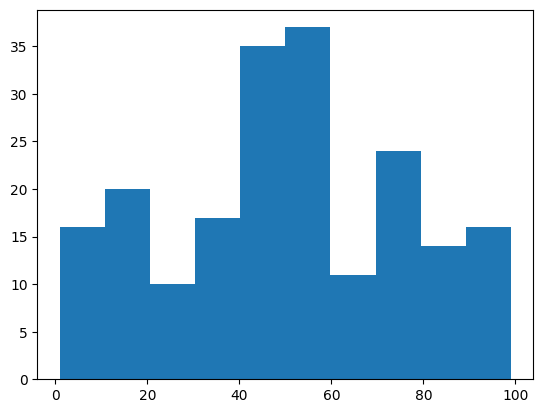

In [4]:
data["Spending Score (1-100)"].hist(grid = False)

### bi-variant analysis

<AxesSubplot: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

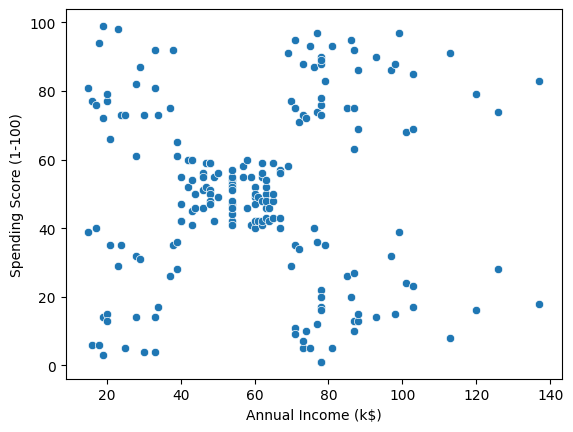

In [5]:
sns.scatterplot(data, x = "Annual Income (k$)", y = "Spending Score (1-100)",)

### multi-variant analysis

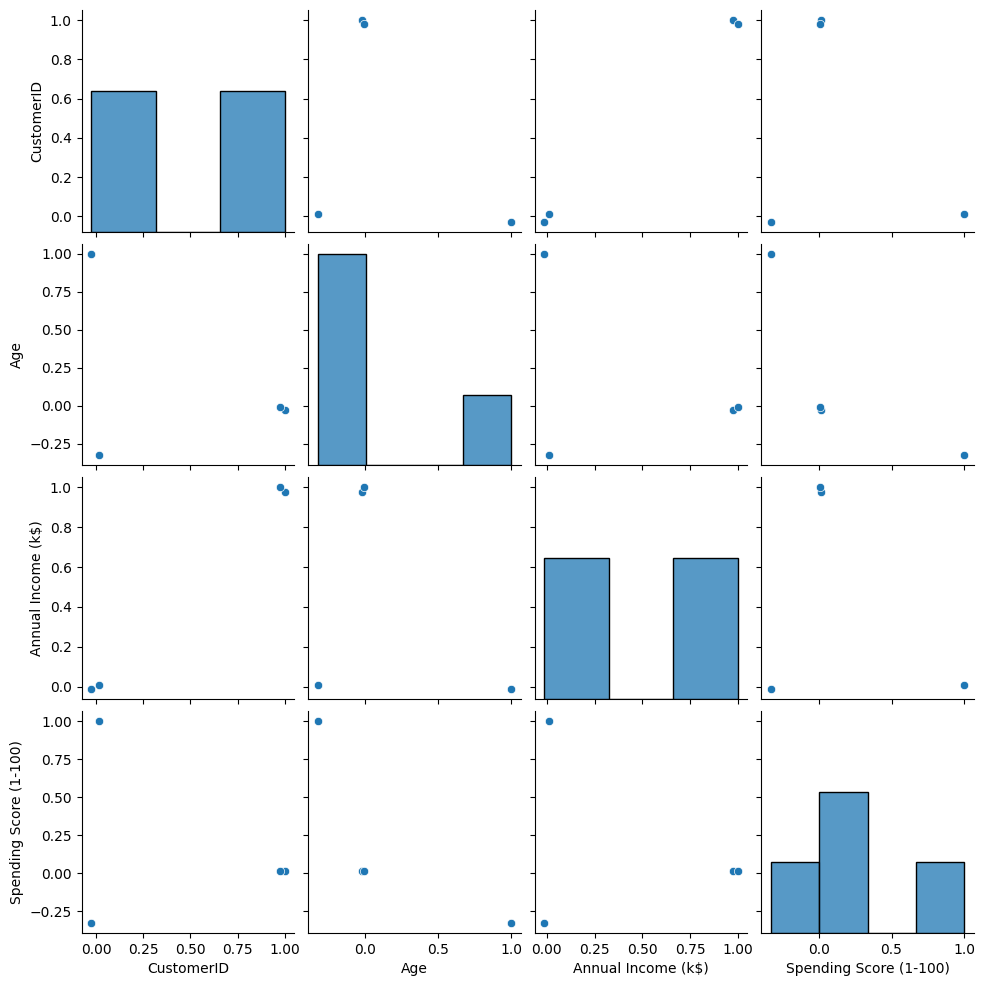

In [6]:
sns.pairplot(data.corr(method = "pearson", numeric_only = True))

### descriptive statistics

In [7]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### missing values

In [8]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### clustering and add to primary dataset

In [9]:
from sklearn.cluster import KMeans


In [10]:
x = data.iloc[:, [3, 4]].values
kmean = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_predict = kmean.fit_predict(x)
y_predict

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

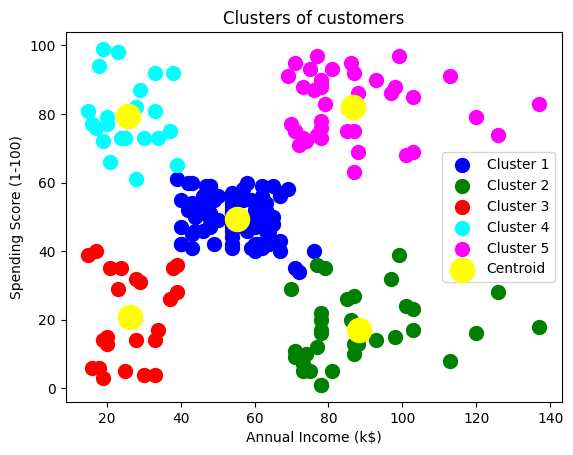

In [11]:
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') 
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') 
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3')
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') 
plt.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show() 

### categorical data to numerical 

In [12]:
gender = {'Male': 1,'Female': 2}
data.Gender = [gender[item] for item in data.Gender]

In [13]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,2,20,16,6
3,4,2,23,16,77
4,5,2,31,17,40
...,...,...,...,...,...
195,196,2,35,120,79
196,197,2,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


### split data

In [14]:
x = data.drop("CustomerID", axis = 1)
y = data.CustomerID
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [15]:
train = pd.concat([x_train, y_train], axis=1)
test = pd.concat([x_test, y_test], axis=1)

list(map(lambda x:x.shape, [train, test]))

[(150, 5), (50, 5)]

### model buliding, training, testing

In [16]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [17]:
enet = ElasticNet()
enet.fit(x_train, y_train)

ElasticNet()

In [18]:
pred = enet.predict(x_test)

In [19]:
mean_squared_error(y_test, pred)

138.94014580573722

In [20]:
rfr = RandomForestRegressor(max_depth = 10, n_estimators=100, max_features="log2")
rfr.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, max_features='log2')

In [21]:
rfr_pred = rfr.predict(x_test)

In [22]:
mean_squared_error(y_test, rfr_pred)

60.40444994361051

### performance analysis using metrics

In [23]:
r2_score(y_test, rfr_pred)

0.9803980149637764